# Dataset Exploration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Cleaning dataset steps**


## Available Datasets

In [1]:
%%bash

cd ../input/
ls

wc -l train.csv # 2.390.492 rows

example_sample_submission.csv
example_test.csv
features.csv
janestreet
train.csv
2390492 train.csv


In [5]:
%%bash

cd ../input/
ls -la --block-size=M

total 5942M
drwxr-xr-x 3 1118 1004    1M Dec  4 19:53 .
drwxr-xr-x 9 1118 1004    1M Dec  4 22:26 ..
-rw-r--r-- 1 1118 1004    1M Nov 17 15:06 example_sample_submission.csv
-rw-r--r-- 1 1118 1004   37M Nov 17 15:06 example_test.csv
-rw-r--r-- 1 1118 1004    1M Nov 17 15:06 features.csv
drwxr-xr-x 3 1118 1004    1M Dec  3 18:23 janestreet
-rw-r--r-- 1 1118 1004 5906M Nov 17 15:07 train.csv


## train.csv

In [7]:
train_df = pd.read_csv("../input/train.csv", nrows=10000)

In [8]:
train_df

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.420165,0.001847,0.016171,0.039813,0.061120,0.051909,-1,-0.803361,-1.687988,...,-2.735500,-0.603269,-1.588024,-0.614948,-2.783072,-0.882524,-1.890361,-0.789504,-1.662447,9995
9996,1,2.852259,-0.000712,-0.004864,-0.009795,-0.018601,-0.019537,1,-0.702446,-1.161989,...,-0.861067,-0.883083,-0.165111,-0.779975,-0.422061,-0.968161,0.167733,-0.920668,-0.010404,9996
9997,1,1.389255,0.002383,0.004190,0.002356,0.006833,0.009608,1,0.130875,-0.608811,...,0.276647,-0.001041,0.269809,-0.036464,0.415885,0.056424,0.422491,-0.036431,0.176114,9997
9998,1,0.085839,-0.003532,-0.037491,-0.053815,-0.052844,-0.065972,1,-3.172026,-3.093182,...,0.027756,0.940655,-0.102939,0.714865,-0.302707,1.022478,-0.315486,0.806448,-0.441524,9998


In [13]:
train_df.dtypes.value_counts()

float64    135
int64        3
dtype: int64

In [9]:
train_df.columns

Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_125', 'feature_126', 'feature_127', 'feature_128',
       'feature_129', 'ts_id'],
      dtype='object', length=138)

### ts_id

In [41]:
# Sanity check
# ts_id == index
sum(train_df["ts_id"] != train_df.index)

0

### date

In [15]:
train_df["date"].value_counts()

0    5587
1    4413
Name: date, dtype: int64

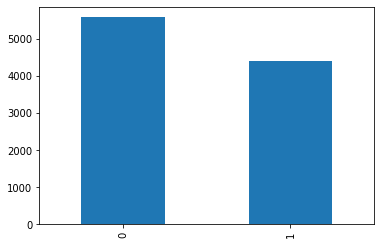

In [18]:
train_df["date"].value_counts().plot.bar();

### weight

In [20]:
train_df["weight"].describe()

count    10000.000000
mean         2.227993
std          6.512468
min          0.000000
25%          0.100645
50%          0.517418
75%          1.781259
max        123.894917
Name: weight, dtype: float64

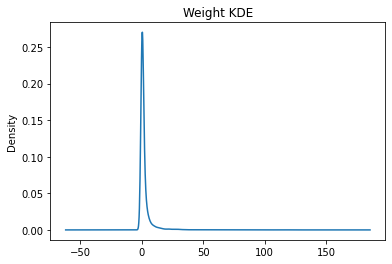

In [23]:
train_df["weight"].plot.kde(title="Weight KDE");

### Features

**130 numerical Features**: feature_0 - features_129

In [28]:
train_df.filter(like="feature").columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_120', 'feature_121', 'feature_122', 'feature_123',
       'feature_124', 'feature_125', 'feature_126', 'feature_127',
       'feature_128', 'feature_129'],
      dtype='object', length=130)

In [26]:
train_df.filter(like="feature").head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
0,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,...,NaN,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807
1,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,...,NaN,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684
2,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,5.448261,...,NaN,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299
3,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,4.508206,...,NaN,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469
4,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,2.683018,...,NaN,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633


In [36]:
# NAs
train_df.filter(like="feature").isna().sum().values

array([   0,    0,    0,    0,    0,    0,    0, 1729, 1729,    2,    2,
        315,  315,   34,   34,   16,   16, 1734, 1734,    2,    2,  319,
        319,   34,   34,   16,   16, 1734, 1734,    2,    2,  319,  319,
         34,   34,   16,   16,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        335,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1586,    2,  250,   34,   16,
          0, 1586,    2,  250,   34,   16,    0, 1586,    2,  250,   34,
         16,    0, 1586,    2,  250,   34,   16,    0, 1586,    2,  250,
         34,   16,    0, 1586,    2,  250,   34,   16,    0, 1586,    2,
        250,   34,   16,    0, 1586,    2,  250,   34,   16,    0,  342,
        342,    0,    0,   35,   35,   21,   21,    4,    4])

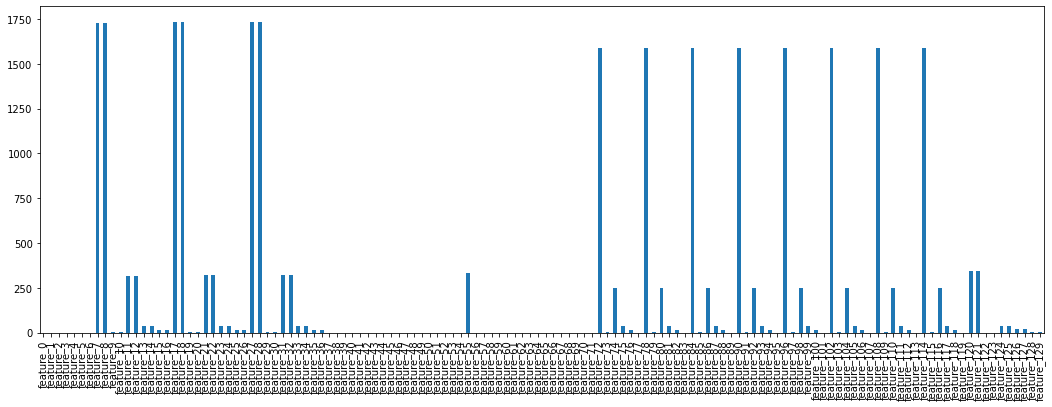

In [33]:
# NAs barplot
train_df.filter(like="feature").isna().sum().plot.bar(figsize=(18,6));

### resp

**Returns:** `resp_1`, `resp_2`, `resp_3`, `resp_4`, `resp`

In [46]:
train_df["resp"].describebe()

count    10000.000000
mean         0.000562
std          0.031490
min         -0.217967
25%         -0.011974
50%          0.000125
75%          0.012136
max          0.180969
Name: resp, dtype: float64

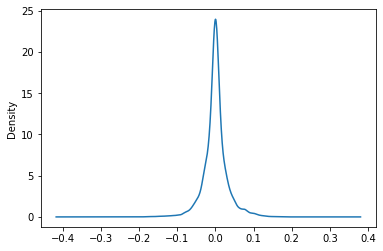

In [45]:
train_df["resp"].plot.kde(title="resp");

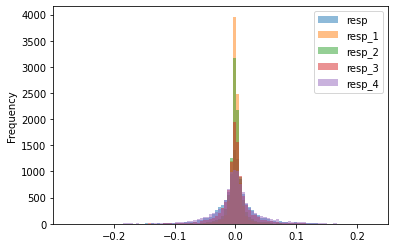

In [53]:
train_df[["resp", "resp_1", "resp_2", "resp_3", "resp_4"]].plot.hist(bins=100, alpha=0.5);

In [58]:
## Correlations
corr_df = train_df[["resp", "resp_1", "resp_2", "resp_3", "resp_4"]].corr()
corr_df.style.background_gradient(cmap ='coolwarm') 

,resp,resp_1,resp_2,resp_3,resp_4
resp,1.000000,0.387370,0.527172,0.713955,0.949965
resp_1,0.387370,1.000000,0.896797,0.656181,0.335854
resp_2,0.527172,0.896797,1.000000,0.812839,0.463837
resp_3,0.713955,0.656181,0.812839,1.000000,0.778084
resp_4,0.949965,0.335854,0.463837,0.778084,1.000000


In [62]:
# Correlations per day
corr_df_per_day = train_df[["date","resp", "resp_1", "resp_2", "resp_3", "resp_4"]].groupby("date").corr()
corr_df_per_day

resp    resp_1    resp_2    resp_3    resp_4
date                                                         
0    resp    1.000000  0.398181  0.530521  0.590132  0.916580
     resp_1  0.398181  1.000000  0.902503  0.676037  0.371347
     resp_2  0.530521  0.902503  1.000000  0.832390  0.505351
     resp_3  0.590132  0.676037  0.832390  1.000000  0.732654
     resp_4  0.916580  0.371347  0.505351  0.732654  1.000000
1    resp    1.000000  0.398175  0.548812  0.885128  0.976254
     resp_1  0.398175  1.000000  0.886651  0.622779  0.320370
     resp_2  0.548812  0.886651  1.000000  0.780087  0.445689
     resp_3  0.885128  0.622779  0.780087  1.000000  0.865868
     resp_4  0.976254  0.320370  0.445689  0.865868  1.000000

In [80]:
# Evaluate the correlation between resp, resp_1 per day
corr_df_per_day.swaplevel().loc["resp", "resp_1"]

date
0    0.398181
1    0.398175
Name: resp_1, dtype: float64